In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
dataset = pd.read_csv('./Datasets/air_satisfaction.csv')
dataset.head()

,Num,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
# удаляем ненужные строки
dataset.drop(['Num','id'], axis=1, inplace=True)
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [5]:
# ищем пропуски
dataset.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [6]:
# удаляем строки с пропусками
dataset.dropna(subset='Arrival Delay in Minutes', axis=0, inplace=True)

In [7]:
# # сокращаем число строк
# dataset = dataset[:10000]
# dataset.shape

In [8]:
# разделение на объекты-признаки и целевой признак
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [9]:
# кодируем категориальные данные из строк в числа
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 0, ..., 0, 1, 0])

In [10]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 1.0, ..., 5, 50, 44.0],
       [1.0, 0.0, 1.0, ..., 5, 0, 0.0],
       [0.0, 1.0, 0.0, ..., 2, 0, 0.0],
       ...,
       [1.0, 0.0, 1.0, ..., 2, 0, 0.0],
       [0.0, 1.0, 1.0, ..., 4, 0, 0.0],
       [1.0, 0.0, 1.0, ..., 1, 0, 0.0]], dtype=object)

In [11]:
# 1.Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [12]:
# 2.Первичное обучение модели и оценка качества
cl1_1 = KNeighborsClassifier(n_neighbors=50)
cl1_1.fit(X_train, y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.6943130250072415, 0.6696273411855571)

In [13]:
# 3.Оценка качества модели с использованием кросс-валидации
scores = cross_val_score(KNeighborsClassifier(n_neighbors=50), X, y, cv=50)
np.mean(scores)

0.68543393351904

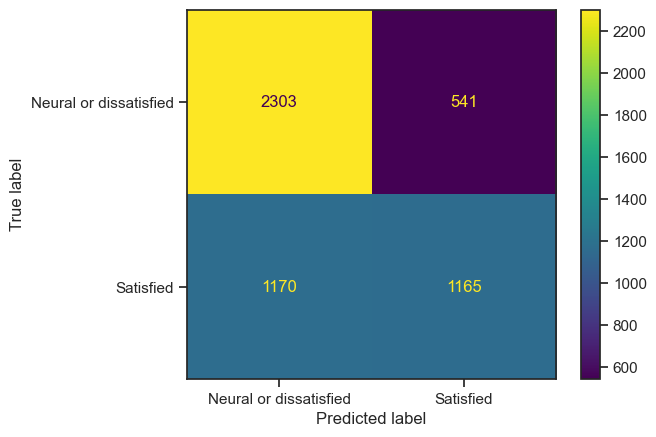

In [14]:
cm1 = confusion_matrix(y_test, target1_1, labels = cl1_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Neural or dissatisfied', 'Satisfied'])
disp.plot()

In [15]:
# 4.Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации
n_range = np.array(range(5,65,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])}]

In [16]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=50, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

CPU times: user 3min 54s, sys: 4.7 s, total: 3min 59s
Wall time: 1min 6s


{'n_neighbors': 5}

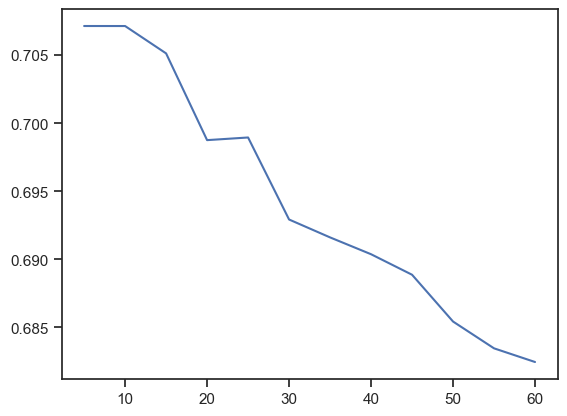

In [17]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [18]:
%%time
# Повторный подбор
n_range = np.array(range(1,11,1))
tuned_parameters = [{'n_neighbors': n_range}]
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=50, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

CPU times: user 3min 3s, sys: 2.57 s, total: 3min 6s
Wall time: 50.2 s


{'n_neighbors': 7}

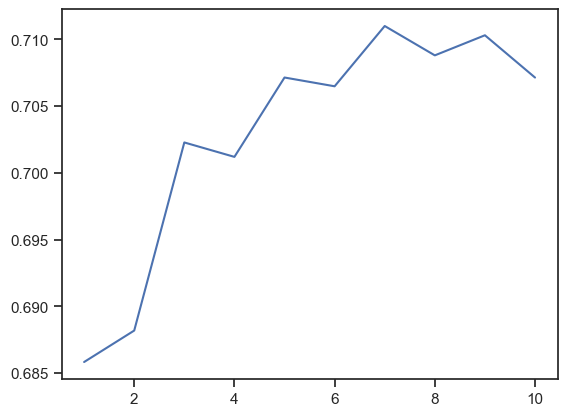

In [19]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [20]:
# 5.Обучение модели и оценка качества с учетом подобранных гиперпараметров (k=7)
clf_gs.best_estimator_.fit(X_train, y_train)
target2_0 = clf_gs.best_estimator_.predict(X_train)
target2_1 = clf_gs.best_estimator_.predict(X_test)
# Новое качество модели
accuracy_score(y_train, target2_0), accuracy_score(y_test, target2_1)

(0.7804866274017572, 0.6937632747634679)

In [21]:
# Качество модели до подбора гиперпараметров
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.6943130250072415, 0.6696273411855571)

In [22]:
cm2 = confusion_matrix(y_test, target2_1, labels = clf_gs.classes_)

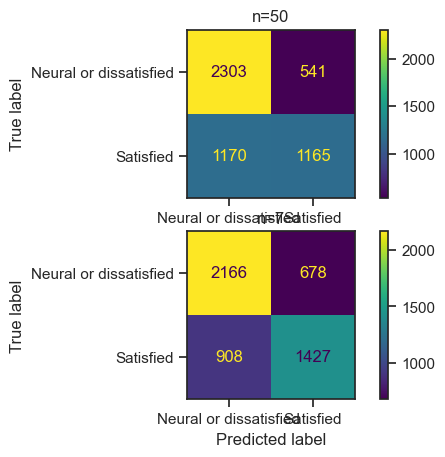

In [23]:
fig, ax = plt.subplots(2,1)
ax[0].set_title("n=50")
ax[1].set_title("n=7")

ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[1]);

In [24]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [25]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

CPU times: user 17min 4s, sys: 6.33 s, total: 17min 11s
Wall time: 5min 10s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

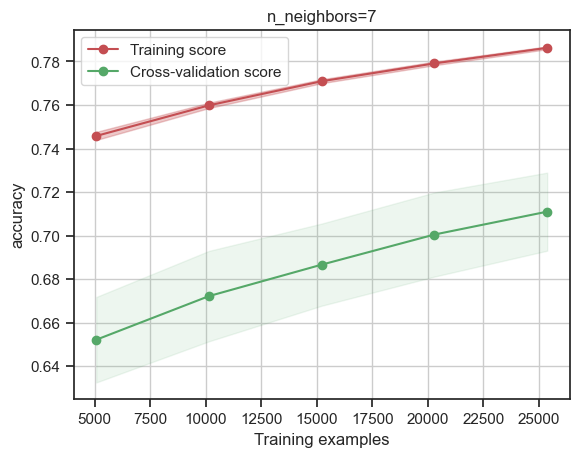

In [26]:
%%time
# 6.Построение кривых обучения и валидации
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=7', X, y, cv=50, train_sizes=np.linspace(.2, 1.0, 5))

CPU times: user 40min 51s, sys: 13.3 s, total: 41min 4s
Wall time: 12min 46s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

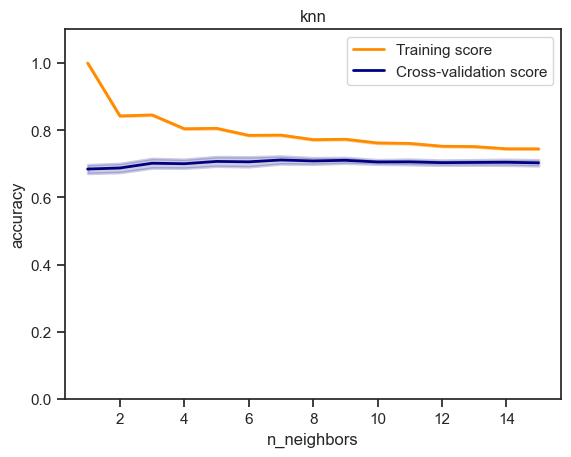

In [28]:
%%time
n_range2 = np.array(range(1,16,1))
plot_validation_curve(clf_gs.best_estimator_, 'knn', X, y, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=20, scoring="accuracy")